In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/data_final.csv', sep=';', encoding='latin1')

In [ ]:
# Visualize as primeiras linhas para uma inspeção inicial dos dados
df.head()

,ï»¿MunicÃ­pio,0101 AÃ§Ãµes coletivas/individuais em saÃºde,0201 Coleta de material,0202 DiagnÃ³stico em laboratÃ³rio clÃ­nico,0203 DiagnÃ³stico por anatomia patolÃ³gica e citopatologia,0204 DiagnÃ³stico por radiologia,0205 DiagnÃ³stico por ultrasonografia,0206 DiagnÃ³stico por tomografia,0207 DiagnÃ³stico por ressonÃ¢ncia magnÃ©tica,0208 DiagnÃ³stico por medicina nuclear in vivo,0209 DiagnÃ³stico por endoscopia,0210 DiagnÃ³stico por radiologia intervencionista,0211 MÃ©todos diagnÃ³sticos em especialidades,0212 DiagnÃ³stico e procedimentos especiais em hemoterapia,0214 DiagnÃ³stico por teste rÃ¡pido,0301 Consultas / Atendimentos / Acompanhamentos,0302 Fisioterapia,0303 Tratamentos clÃ­nicos (outras especialidades),0304 Tratamento em oncologia,0305 Tratamento em nefrologia,0306 Hemoterapia,0307 Tratamentos odontolÃ³gicos,"0308 Tratamento de lesÃµes, envenenamentos e outros, decorrentes de causas externas",0309 Terapias especializadas,0310 Parto e nascimento,"0401 Pequenas cirurgias e cirurgias de pele, tecido subcutÃ¢neo e mucosa",0402 Cirurgia de glÃ¢ndulas endÃ³crinas,0403 Cirurgia do sistema nervoso central e perifÃ©rico,"0404 Cirurgia das vias aÃ©reas superiores, da face, da cabeÃ§a e do pescoÃ§o",0405 Cirurgia do aparelho da visÃ£o,0406 Cirurgia do aparelho circulatÃ³rio,"0407 Cirurgia do aparelho digestivo, orgÃ£os anexos e parede abdominal",0408 Cirurgia do sistema osteomuscular,0409 Cirurgia do aparelho geniturinÃ¡rio,0410 Cirurgia de mama,0411 Cirurgia obstÃ©trica,0412 Cirurgia torÃ¡cica,0413 Cirurgia reparadora,0414 Bucomaxilofacial,0415 Outras cirurgias,0416 Cirurgia em oncologia,0418 Cirurgia em nefrologia,"0501 Coleta e exames para fins de doaÃ§Ã£o de orgÃ£os, tecidos e cÃ©lulas e de transplante",0502 AvaliaÃ§Ã£o de morte encefÃ¡lica,0503 AÃ§Ãµes relacionadas Ã doaÃ§Ã£o de orgÃ£os e tecidos para transplante,0504 Processamento de tecidos para transplante,"0505 Transplante de orgÃ£os, tecidos e cÃ©lulas",0506 Acompanhamento e intercorrÃªncias no prÃ© e pÃ³s-transplante,0603 Medicamentos de Ã¢mbito hospitalar e urgÃªncia,"0702 Ãrteses, prÃ³teses e materiais especiais relacionados ao ato cirÃºrgico",0801 AÃ§Ãµes relacionadas ao estabelecimento,0802 AÃ§Ãµes relacionadas ao atendimento,Total,Mes,Ano,Conteudo,Mes.1,Ano.1,Conteudo.1
0,110001 ALTA FLORESTA D'OESTE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,0,13,0,0,4,0,4,0,0,0,0,0,0,4,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,284,Abr,2019,Quantidade aprovada,Abr,2019,Quantidade aprovada
1,110002 ARIQUEMES,0,11,138,0,0,2,8,0,0,0,0,0,0,0,4603,1411,238,1,39,72,0,15,11,79,870,0,0,0,0,0,36,7,20,1,80,14,0,0,3,0,2,0,0,0,0,0,0,13,11,56,1301,9042,Abr,2019,Quantidade aprovada,Abr,2019,Quantidade aprovada
2,110003 CABIXI,0,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,125,Abr,2019,Quantidade aprovada,Abr,2019,Quantidade aprovada
3,110004 CACOAL,0,3,8897,0,346,118,516,6,0,0,0,86,0,259,18570,893,513,136,71,222,0,80,0,15,661,4,15,18,0,3,107,164,47,2,102,24,1,3,36,13,0,6,1,4,0,0,0,1,75,97,2030,34145,Abr,2019,Quantidade aprovada,Abr,2019,Quantidade aprovada
4,110005 CEREJEIRAS,0,0,96,0,55,0,0,0,0,0,0,2,0,0,261,0,97,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160,675,Abr,2019,Quantidade aprovada,Abr,2019,Quantidade aprovada


# Info dos Dados


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Verificar valores ausentes (missing values) em cada coluna
missing_values = df.isnull().sum()
print(missing_values)

ï»¿MunicÃ­pio                                                                                 0
0101 AÃ§Ãµes coletivas/individuais em saÃºde                                                  0
0201 Coleta de material                                                                       0
0202 DiagnÃ³stico em laboratÃ³rio clÃ­nico                                                    0
0203 DiagnÃ³stico por anatomia patolÃ³gica e citopatologia                                    0
0204 DiagnÃ³stico por radiologia                                                              0
0205 DiagnÃ³stico por ultrasonografia                                                         0
0206 DiagnÃ³stico por tomografia                                                              0
0207 DiagnÃ³stico por ressonÃ¢ncia magnÃ©tica                                                 0
0208 DiagnÃ³stico por medicina nuclear in vivo                                                0
0209 DiagnÃ³stico por endoscopia        

In [ ]:
# Obter estatísticas descritivas para identificar outliers e outras anomalias
descricao_estatistica = df.describe()
print(descricao_estatistica)

       0502 AvaliaÃ§Ã£o de morte encefÃ¡lica            Ano          Ano.1
count                          359991.000000  359991.000000  359991.000000
mean                               19.353951    2021.000539    2021.000539
std                               253.079946       1.411996       1.411996
min                                 0.000000    2019.000000    2019.000000
25%                                 0.000000    2020.000000    2020.000000
50%                                 0.000000    2021.000000    2021.000000
75%                                 0.000000    2022.000000    2022.000000
max                             18765.000000    2023.000000    2023.000000


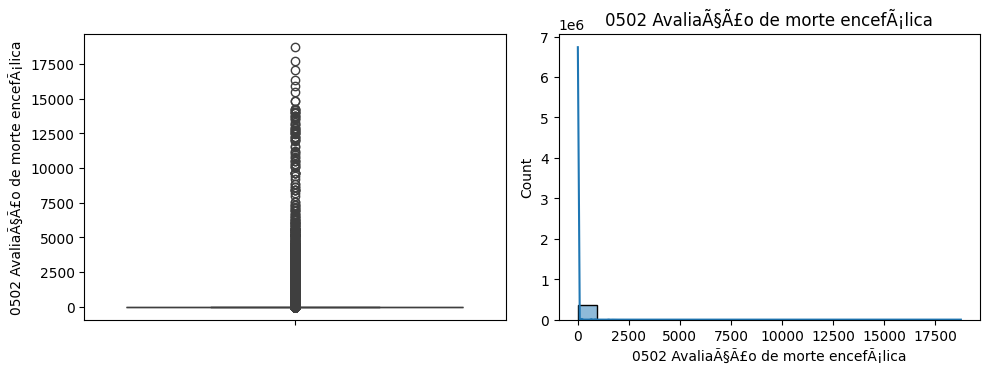

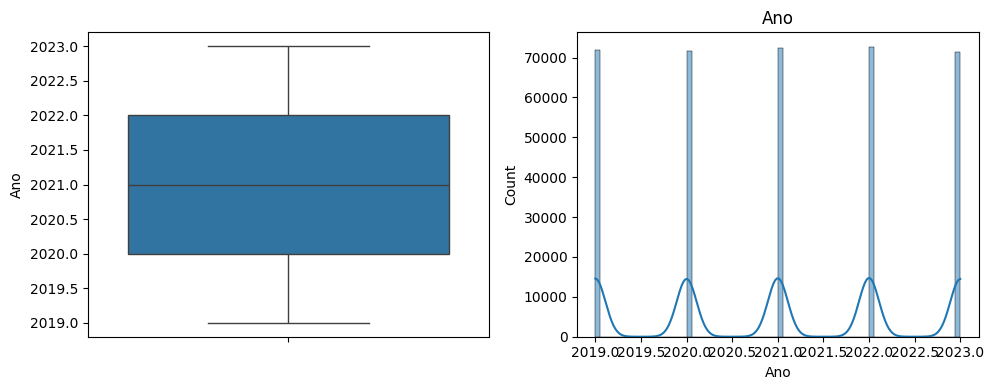

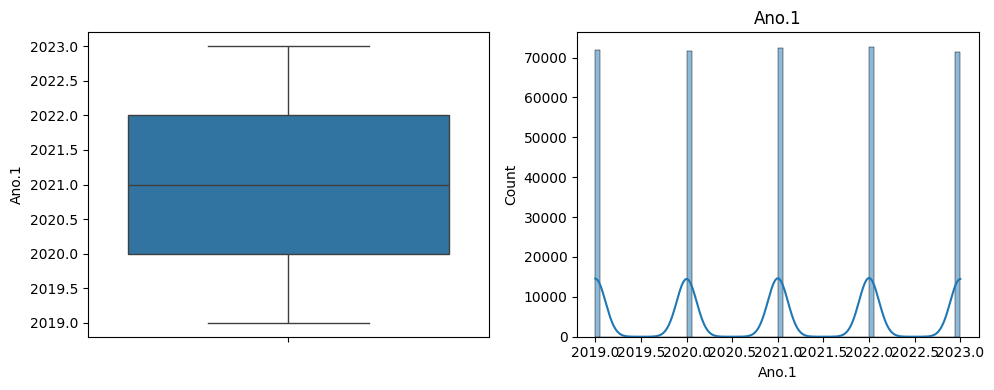

In [ ]:
# Visualizações para identificar outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[column])
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()
    plt.show()

In [ ]:
# Para verificar a proporção de valores ausentes em relação ao total
proporcao_valores_ausentes = missing_values / len(df)
print(proporcao_valores_ausentes)

ï»¿MunicÃ­pio                                                                                 0.0
0101 AÃ§Ãµes coletivas/individuais em saÃºde                                                  0.0
0201 Coleta de material                                                                       0.0
0202 DiagnÃ³stico em laboratÃ³rio clÃ­nico                                                    0.0
0203 DiagnÃ³stico por anatomia patolÃ³gica e citopatologia                                    0.0
0204 DiagnÃ³stico por radiologia                                                              0.0
0205 DiagnÃ³stico por ultrasonografia                                                         0.0
0206 DiagnÃ³stico por tomografia                                                              0.0
0207 DiagnÃ³stico por ressonÃ¢ncia magnÃ©tica                                                 0.0
0208 DiagnÃ³stico por medicina nuclear in vivo                                                0.0
0209 DiagnÃ³stico po

In [ ]:
# Estatísticas descritivas para identificar anomalias e outliers
# Calculando apenas para colunas numéricas
desc_stats = df.describe(include=[np.number])

# Identificar outliers potenciais através do método do Intervalo Interquartílico (IQR)
numeric_cols = df.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para considerar um ponto de dado como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers usando apenas as colunas numéricas
outliers = numeric_cols[(numeric_cols < lower_bound) | (numeric_cols > upper_bound)]

# Resumo das informações obtidas
print("\nOutliers Detectados por Coluna:\n", outliers)


Outliers Detectados por Coluna:
         0502 AvaliaÃ§Ã£o de morte encefÃ¡lica  Ano  Ano.1
0                                         NaN  NaN    NaN
1                                         NaN  NaN    NaN
2                                         NaN  NaN    NaN
3                                         1.0  NaN    NaN
4                                         NaN  NaN    NaN
...                                       ...  ...    ...
359986                                    NaN  NaN    NaN
359987                                    NaN  NaN    NaN
359988                                    NaN  NaN    NaN
359989                                    NaN  NaN    NaN
359990                                  430.0  NaN    NaN

[359991 rows x 3 columns]
